# Students’ Early Attrition Modelling

In [415]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import re
import sys,traceback

In [416]:
'''Function to load the dataset'''
def data_init(data_filepath):
    try:
        data = pd.read_csv(data_filepath,low_memory= False)

        col_list = list(data)

        print("Loaded successfully.")
    
        return data
    except:
        print("File Could not be loaded")
        print("Check your file or filepathname")
        return False

In [417]:
'''User interacive way to access the dataset'''
c = 1
while (c!=0):
    data_filepath = str(input("Enter data filepath:"))
    if os.path.isfile(data_filepath) :
        data = data_init(data_filepath)
    else:
        '''Add double slash in filepath and try again!'''
        data_filepath = re.escape(data_filepath)
        data = data_init(data_filepath)
    if type(data) != str: c = 0
    else: print ("Check if file exists in the filepath and Let's try again ! \n")

Enter data filepath:D:\data\capston project\python capstone\newdata.csv
Loaded successfully.


In [418]:
#Import Data
col_names = data.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
data.head()

Column names:
['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F', 'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F', 'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F', 'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S', 'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S', 'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S', 'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S', 'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S', 'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_CD', 

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0.0,0.0,0.0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000.0,1355760.0,785760.0,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0.0,0.0,0.0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0.0,0.0,0.0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920.0,1355760.0,519840.0,278340.0


In [419]:
data.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,3.241671e+05
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,5.409637e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,4.576950e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.121207e+07


In [420]:
count_row = data.shape[0]  # gives number of row count
print(count_row)
count_col = data.shape[1]  # gives number of col count
print(count_col)

3400
56


# # Missing value 

In [421]:
#data["RETURNED_2ND_YR"]={0: 1, 1:0}
data["RETURNED_2ND_YR"].replace({1: 0,
                                    0: 1}, inplace=True)

In [422]:
data["RETURNED_2ND_YR"]

0       1
1       0
2       0
3       0
4       0
       ..
3395    1
3396    1
3397    1
3398    0
3399    1
Name: RETURNED_2ND_YR, Length: 3400, dtype: int64

In [423]:
# removing columns above 50% missing values
missing_val_count_by_column = (data.isnull().sum())
high_missing_values=print(missing_val_count_by_column[missing_val_count_by_column >= ((count_row)/2)])

STDNT_TEST_ENTRANCE1     2294
CORE_COURSE_NAME_5_F     2755
CORE_COURSE_GRADE_5_F    2755
CORE_COURSE_NAME_6_F     3272
CORE_COURSE_GRADE_6_F    3272
CORE_COURSE_NAME_4_S     2045
CORE_COURSE_GRADE_4_S    2045
CORE_COURSE_NAME_5_S     2950
CORE_COURSE_GRADE_5_S    2950
CORE_COURSE_NAME_6_S     3319
CORE_COURSE_GRADE_6_S    3319
dtype: int64


In [424]:
# removing 11 columns
data.drop(['STDNT_TEST_ENTRANCE1',
'CORE_COURSE_NAME_5_F',
'CORE_COURSE_GRADE_5_F',
'CORE_COURSE_NAME_6_F',
'CORE_COURSE_GRADE_6_F',
'CORE_COURSE_NAME_4_S',
'CORE_COURSE_GRADE_4_S',
'CORE_COURSE_NAME_5_S'  ,   
'CORE_COURSE_GRADE_5_S'  ,  
'CORE_COURSE_NAME_6_S'    , 
'CORE_COURSE_GRADE_6_S'                ],axis = 1, inplace = True)

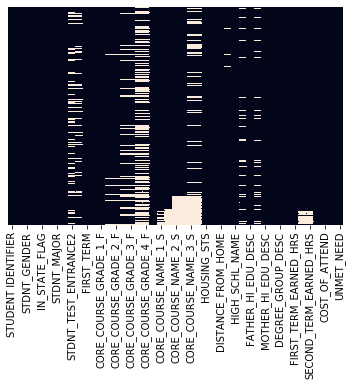

In [425]:
#missing values
sns.heatmap(data.isnull(),yticklabels=False ,cbar = False)

In [426]:
# to find catagorical variables and numerical variables
num_col = data.select_dtypes(include = np.number).columns
print("numerical:\n", num_col)

cat_col = data.select_dtypes(exclude = np.number).columns
print("catagorical:\n", cat_col)

numerical:
 Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'SECOND_TERM',
       'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA',
       'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD', 'FIRST_TERM_ATTEMPT_HRS',
       'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS',
       'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND',
       'EST_FAM_CONTRIBUTION', 'UNMET_NEED'],
      dtype='object')
catagorical:
 Index(['STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
       'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 

In [427]:
data = data.rename(columns = lambda x : x.strip())

In [428]:
print(data["RETURNED_2ND_YR"].value_counts())
print(data.shape)

0    2677
1     723
Name: RETURNED_2ND_YR, dtype: int64
(3400, 45)


In [429]:
data['STDNT_TEST_ENTRANCE2']  = data["STDNT_TEST_ENTRANCE2"].fillna(data['STDNT_TEST_ENTRANCE2'].mean())
data['STDNT_TEST_ENTRANCE_COMB']  = data["STDNT_TEST_ENTRANCE_COMB"].fillna(data['STDNT_TEST_ENTRANCE_COMB'].mean())
data['FIRST_TERM'] = data['FIRST_TERM'].fillna(data['FIRST_TERM'].mean())
data['SECOND_TERM']  = data['SECOND_TERM'].fillna(data['SECOND_TERM'].mean())
data['DISTANCE_FROM_HOME'] = data['DISTANCE_FROM_HOME'].fillna(data['DISTANCE_FROM_HOME'].mean())
data['HIGH_SCHL_GPA'] = data['HIGH_SCHL_GPA'].fillna(data['HIGH_SCHL_GPA'].mean())
data['FATHER_HI_EDU_CD'] = data['FATHER_HI_EDU_CD'].fillna(data['FATHER_HI_EDU_CD'].mean())
data['MOTHER_HI_EDU_CD'] = data['MOTHER_HI_EDU_CD'].fillna(data['MOTHER_HI_EDU_CD'].mean())
data['FIRST_TERM_ATTEMPT_HRS'] = data['FIRST_TERM_ATTEMPT_HRS'].fillna(data['FIRST_TERM_ATTEMPT_HRS'].mean())
data['SECOND_TERM_ATTEMPT_HRS'] = data['SECOND_TERM_ATTEMPT_HRS'].fillna(data['SECOND_TERM_ATTEMPT_HRS'].mean())
data['SECOND_TERM_EARNED_HRS'] = data['SECOND_TERM_EARNED_HRS'].fillna(data['SECOND_TERM_EARNED_HRS'].mean())

In [430]:
data['RETURNED_2ND_YR'] = data['RETURNED_2ND_YR'].fillna(data['RETURNED_2ND_YR'].mode()[0])

In [431]:
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

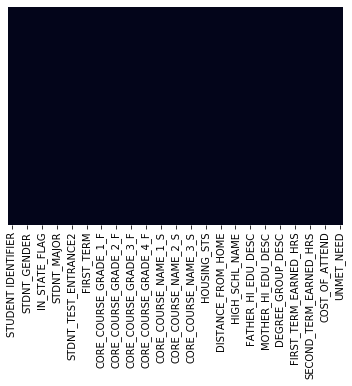

In [432]:
sns.heatmap(data.isnull(), yticklabels= False,cbar = False)

In [433]:
#Check for Missing Values
data.isnull().any()

STUDENT IDENTIFIER          False
STDNT_AGE                   False
STDNT_GENDER                False
STDNT_BACKGROUND            False
IN_STATE_FLAG               False
INTERNATIONAL_STS           False
STDNT_MAJOR                 False
STDNT_MINOR                 False
STDNT_TEST_ENTRANCE2        False
STDNT_TEST_ENTRANCE_COMB    False
FIRST_TERM                  False
CORE_COURSE_NAME_1_F        False
CORE_COURSE_GRADE_1_F       False
CORE_COURSE_NAME_2_F        False
CORE_COURSE_GRADE_2_F       False
CORE_COURSE_NAME_3_F        False
CORE_COURSE_GRADE_3_F       False
CORE_COURSE_NAME_4_F        False
CORE_COURSE_GRADE_4_F       False
SECOND_TERM                 False
CORE_COURSE_NAME_1_S        False
CORE_COURSE_GRADE_1_S       False
CORE_COURSE_NAME_2_S        False
CORE_COURSE_GRADE_2_S       False
CORE_COURSE_NAME_3_S        False
CORE_COURSE_GRADE_3_S       False
HOUSING_STS                 False
RETURNED_2ND_YR             False
DISTANCE_FROM_HOME          False
HIGH_SCHL_GPA 

# EDA

In [434]:
print(data['GROSS_FIN_NEED'].dtypes)

float64


In [435]:
#replacing 0.0 to mean
data['GROSS_FIN_NEED']=data['GROSS_FIN_NEED'].replace(0.0,data['GROSS_FIN_NEED'].mean())

In [436]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.0,14.0,303402.506471,0.0,0.0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.0,18.0,570000.000000,1355760.0,785760.0,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.0,14.0,303402.506471,0.0,0.0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.0,14.0,303402.506471,0.0,0.0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.0,12.0,835920.000000,1355760.0,519840.0,278340.0


In [437]:
# replacing 0.0 to mean
data['COST_OF_ATTEND']=data['COST_OF_ATTEND'].replace(0.0,data['COST_OF_ATTEND'].mean())
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.0,14.0,303402.506471,5.515335e+05,0.0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.0,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.0,14.0,303402.506471,5.515335e+05,0.0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.0,14.0,303402.506471,5.515335e+05,0.0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.0,278340.0


In [438]:
# replacing 0.0 to mean
data['EST_FAM_CONTRIBUTION']=data['EST_FAM_CONTRIBUTION'].replace(0.0,data['EST_FAM_CONTRIBUTION'].mean())
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.0,14.0,303402.506471,5.515335e+05,344689.923529,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.000000,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.0,14.0,303402.506471,5.515335e+05,344689.923529,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.0,14.0,303402.506471,5.515335e+05,344689.923529,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.000000,278340.0


In [439]:
# replacing 0.0 to mean
data['UNMET_NEED']=data['UNMET_NEED'].replace(0.0,data['UNMET_NEED'].mean())
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
1,7830063,19,F,BGD 1,N,N,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.000000,459300.000000
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
4,7962680,18,F,BGD 1,Y,N,Art,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.000000,278340.000000


In [440]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Accounting' 'Criminal Justice' 'Psychology' 'Theatre Arts' 'Nursing'
 'Pre1Nursing' 'Chemistry' 'Pre1Engineering/RETP'
 'Early Childhood Education' 'Music Performance'
 'English Language/Literature' 'Joint Enrollment 1 Accel'
 'History and Secondary Ed' 'History' 'Engineering Studies'
 'Computer Science 1 Systems' 'Pre1Business' 'Management'
 'Theatre Education' 'Marketing' 'Communication' 'Music Education'
 'French with Teacher Cert' 'English and Secondary Ed' 'Exercise Science'
 'General Business' 'Mathematics and Secondary Ed' 'Finance' 'French'
 'Health Science' 'Spec Ed: Gen. Curr. 1 Reading' 'Music'
 'Middle Grades Education' 'Geology' 'Management Information Systems'
 'Art Education' 'Applied Computer Science' 'Information Technology'
 'Sociology' 'Computer Science 1 Games' 'Spanish' 'General Studies/AS'
 'Biology and Secondary Ed' 'Chemistry and Secondary Ed'
 'Health and Physical Education' 'Liberal Arts'
 'Span

(3400, 45)

In [441]:
#Combine values to computer science
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Computer Science - Games', 'Computer Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Applied Computer Science', 'Computer Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Computer Science - Systems', 'Computer Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Information Technology', 'Computer Science', data['STDNT_MAJOR'])
print(data.shape)

(3400, 45)


In [442]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Accounting' 'Criminal Justice' 'Psychology' 'Theatre Arts' 'Nursing'
 'Pre1Nursing' 'Chemistry' 'Pre1Engineering/RETP'
 'Early Childhood Education' 'Music Performance'
 'English Language/Literature' 'Joint Enrollment 1 Accel'
 'History and Secondary Ed' 'History' 'Engineering Studies'
 'Computer Science 1 Systems' 'Pre1Business' 'Management'
 'Theatre Education' 'Marketing' 'Communication' 'Music Education'
 'French with Teacher Cert' 'English and Secondary Ed' 'Exercise Science'
 'General Business' 'Mathematics and Secondary Ed' 'Finance' 'French'
 'Health Science' 'Spec Ed: Gen. Curr. 1 Reading' 'Music'
 'Middle Grades Education' 'Geology' 'Management Information Systems'
 'Art Education' 'Computer Science' 'Sociology' 'Computer Science 1 Games'
 'Spanish' 'General Studies/AS' 'Biology and Secondary Ed'
 'Chemistry and Secondary Ed' 'Health and Physical Education'
 'Liberal Arts' 'Spanish with Teacher Cert' 'Earth and 

(3400, 45)

In [443]:
#Combine values to Nursing
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Pre-Nursing', 'Nursing', data['STDNT_MAJOR'])

In [444]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Accounting' 'Criminal Justice' 'Psychology' 'Theatre Arts' 'Nursing'
 'Pre1Nursing' 'Chemistry' 'Pre1Engineering/RETP'
 'Early Childhood Education' 'Music Performance'
 'English Language/Literature' 'Joint Enrollment 1 Accel'
 'History and Secondary Ed' 'History' 'Engineering Studies'
 'Computer Science 1 Systems' 'Pre1Business' 'Management'
 'Theatre Education' 'Marketing' 'Communication' 'Music Education'
 'French with Teacher Cert' 'English and Secondary Ed' 'Exercise Science'
 'General Business' 'Mathematics and Secondary Ed' 'Finance' 'French'
 'Health Science' 'Spec Ed: Gen. Curr. 1 Reading' 'Music'
 'Middle Grades Education' 'Geology' 'Management Information Systems'
 'Art Education' 'Computer Science' 'Sociology' 'Computer Science 1 Games'
 'Spanish' 'General Studies/AS' 'Biology and Secondary Ed'
 'Chemistry and Secondary Ed' 'Health and Physical Education'
 'Liberal Arts' 'Spanish with Teacher Cert' 'Earth and 

(3400, 45)

In [445]:
#Combine values to art
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Theatre Arts', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Music Performance', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Theatre Education', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Exercise Science', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Art Education', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Health and Physical Education', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Liberal Arts', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Music', 'Art', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Music Education', 'Art', data['STDNT_MAJOR'])

In [446]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Accounting' 'Criminal Justice' 'Psychology' 'Nursing' 'Pre1Nursing'
 'Chemistry' 'Pre1Engineering/RETP' 'Early Childhood Education'
 'English Language/Literature' 'Joint Enrollment 1 Accel'
 'History and Secondary Ed' 'History' 'Engineering Studies'
 'Computer Science 1 Systems' 'Pre1Business' 'Management' 'Marketing'
 'Communication' 'French with Teacher Cert' 'English and Secondary Ed'
 'General Business' 'Mathematics and Secondary Ed' 'Finance' 'French'
 'Health Science' 'Spec Ed: Gen. Curr. 1 Reading'
 'Middle Grades Education' 'Geology' 'Management Information Systems'
 'Computer Science' 'Sociology' 'Computer Science 1 Games' 'Spanish'
 'General Studies/AS' 'Biology and Secondary Ed'
 'Chemistry and Secondary Ed' 'Spanish with Teacher Cert'
 'Earth and Space Science' 'Early Admission 1 Accel']


(3400, 45)

In [447]:
#Combine values to political science
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Criminal Justice', 'Political Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Early Childhood Education', 'Political Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='History', 'Political Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='History and Secondary Ed', 'Political Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='History', 'Political Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Geology', 'Political Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Middle Grades Education', 'Political Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Sociology', 'Political Science', data['STDNT_MAJOR'])

In [448]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Accounting' 'Psychology' 'Nursing' 'Pre1Nursing' 'Chemistry'
 'Pre1Engineering/RETP' 'English Language/Literature'
 'Joint Enrollment 1 Accel' 'Engineering Studies'
 'Computer Science 1 Systems' 'Pre1Business' 'Management' 'Marketing'
 'Communication' 'French with Teacher Cert' 'English and Secondary Ed'
 'General Business' 'Mathematics and Secondary Ed' 'Finance' 'French'
 'Health Science' 'Spec Ed: Gen. Curr. 1 Reading'
 'Management Information Systems' 'Computer Science'
 'Computer Science 1 Games' 'Spanish' 'General Studies/AS'
 'Biology and Secondary Ed' 'Chemistry and Secondary Ed'
 'Spanish with Teacher Cert' 'Earth and Space Science'
 'Early Admission 1 Accel']


(3400, 45)

In [449]:
#Combine values to biology
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Psychology', 'Biology', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Biology and Secondary Ed', 'Biologye', data['STDNT_MAJOR'])


In [450]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Accounting' 'Nursing' 'Pre1Nursing' 'Chemistry' 'Pre1Engineering/RETP'
 'English Language/Literature' 'Joint Enrollment 1 Accel'
 'Engineering Studies' 'Computer Science 1 Systems' 'Pre1Business'
 'Management' 'Marketing' 'Communication' 'French with Teacher Cert'
 'English and Secondary Ed' 'General Business'
 'Mathematics and Secondary Ed' 'Finance' 'French' 'Health Science'
 'Spec Ed: Gen. Curr. 1 Reading' 'Management Information Systems'
 'Computer Science' 'Computer Science 1 Games' 'Spanish'
 'General Studies/AS' 'Biologye' 'Chemistry and Secondary Ed'
 'Spanish with Teacher Cert' 'Earth and Space Science'
 'Early Admission 1 Accel']


(3400, 45)

In [451]:
#Combine values to management
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Accounting', 'Management', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Pre-Business', 'Management', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='General Business', 'Management', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Marketing', 'Management', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Management Information Systems', 'Management', data['STDNT_MAJOR'])


In [452]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Mathematics' 'Art' 'Political Science' 'Biology'
 'Management' 'Nursing' 'Pre1Nursing' 'Chemistry' 'Pre1Engineering/RETP'
 'English Language/Literature' 'Joint Enrollment 1 Accel'
 'Engineering Studies' 'Computer Science 1 Systems' 'Pre1Business'
 'Communication' 'French with Teacher Cert' 'English and Secondary Ed'
 'Mathematics and Secondary Ed' 'Finance' 'French' 'Health Science'
 'Spec Ed: Gen. Curr. 1 Reading' 'Computer Science'
 'Computer Science 1 Games' 'Spanish' 'General Studies/AS' 'Biologye'
 'Chemistry and Secondary Ed' 'Spanish with Teacher Cert'
 'Earth and Space Science' 'Early Admission 1 Accel']


(3400, 45)

In [453]:
#Combine values to science
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Mathematics', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Biology', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Pre-Engineering/RETP', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Engineering Studies', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Computer Science', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Mathematics and Secondary Ed', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Health Science', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Biologye', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Chemistry and Secondary Ed', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Earth and Space Science', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Chemistry', 'Science', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Nursing', 'Science', data['STDNT_MAJOR'])

In [454]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Science' 'Art' 'Political Science' 'Management'
 'Pre1Nursing' 'Pre1Engineering/RETP' 'English Language/Literature'
 'Joint Enrollment 1 Accel' 'Computer Science 1 Systems' 'Pre1Business'
 'Communication' 'French with Teacher Cert' 'English and Secondary Ed'
 'Finance' 'French' 'Spec Ed: Gen. Curr. 1 Reading'
 'Computer Science 1 Games' 'Spanish' 'General Studies/AS'
 'Spanish with Teacher Cert' 'Early Admission 1 Accel']


(3400, 45)

In [455]:
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Art', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Political Science', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Communication', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='French with Teacher Cert', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='English and Secondary Ed', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='French', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Spanish', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Spanish with Teacher Cert', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='English Language/Literature', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Spec Ed: Gen. Curr. - Reading', 'Arts and Lang', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='General Studies/AS', 'Arts and Lang', data['STDNT_MAJOR'])

In [456]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Science' 'Arts and Lang' 'Management' 'Pre1Nursing'
 'Pre1Engineering/RETP' 'Joint Enrollment 1 Accel'
 'Computer Science 1 Systems' 'Pre1Business' 'Finance'
 'Spec Ed: Gen. Curr. 1 Reading' 'Computer Science 1 Games'
 'Early Admission 1 Accel']


(3400, 45)

In [457]:
# combine values to commerce
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Management', 'Commerce', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Finance', 'Commerce', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Joint Enrollment - Accel', 'Commerce', data['STDNT_MAJOR'])
data['STDNT_MAJOR']=np.where(data['STDNT_MAJOR'] =='Early Admission - Accel', 'Commerce', data['STDNT_MAJOR'])

In [458]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Science' 'Arts and Lang' 'Commerce' 'Pre1Nursing'
 'Pre1Engineering/RETP' 'Joint Enrollment 1 Accel'
 'Computer Science 1 Systems' 'Pre1Business'
 'Spec Ed: Gen. Curr. 1 Reading' 'Computer Science 1 Games'
 'Early Admission 1 Accel']


(3400, 45)

In [459]:
data

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.000000,14.000000,303402.506471,5.515335e+05,3.446899e+05,3.241671e+05
1,7830063,19,F,BGD 1,N,N,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.000000,18.000000,570000.000000,1.355760e+06,7.857600e+05,4.593000e+05
2,7847538,18,M,BGD 1,Y,N,Science,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.000000,14.000000,303402.506471,5.515335e+05,3.446899e+05,3.241671e+05
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.000000,14.000000,303402.506471,5.515335e+05,3.446899e+05,3.241671e+05
4,7962680,18,F,BGD 1,Y,N,Arts and Lang,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.000000,12.000000,835920.000000,1.355760e+06,5.198400e+05,2.783400e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,7948112,18,F,BGD 4,N,N,Arts and Lang,N,800.000000,790.0,...,B,Bachelors,18,18,16.000000,13.000000,303402.506471,5.515335e+05,3.446899e+05,3.241671e+05
3396,8023055,18,F,BGD 1,Y,N,Science,N,965.092295,950.0,...,B,Bachelors,13,9,14.285848,12.511125,303402.506471,5.515335e+05,3.446899e+05,3.241671e+05
3397,7926915,18,F,BGD 4,Y,N,Science,N,1020.000000,1030.0,...,B,Bachelors,14,6,14.285848,12.511125,303402.506471,9.458400e+05,1.288980e+06,3.241671e+05
3398,7877332,18,F,BGD 3,Y,N,Joint Enrollment 1 Accel,N,965.092295,990.0,...,B,Bachelors,12,9,14.285848,12.511125,303402.506471,2.691000e+05,3.446899e+05,1.231720e+06


In [460]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
1,7830063,19,F,BGD 1,N,N,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.000000,459300.000000
2,7847538,18,M,BGD 1,Y,N,Science,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
4,7962680,18,F,BGD 1,Y,N,Arts and Lang,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.000000,278340.000000


In [461]:
#To get the unique values for STDNT_MAJOR
print(data['STDNT_MINOR'].unique())
data.shape

['N' 'Theatre Arts' 'Foundations of Business' 'Spanish'
 'Professional Writing' 'Computer Science 1 Systems' 'Art' 'Mathematics'
 'Chemistry' 'Psychology' "Women's Studies" 'Creative Writing' 'Biology'
 'History' 'Early Childhood Education' 'Health Science' 'Accounting'
 'Political Science' 'Communication' 'Asian Studies' 'Criminal Justice'
 'English Language/Literature' 'Art History' 'Marketing' 'French'
 'Economics' 'Sociology' 'International Business' 'Music'
 'Exercise Science' 'Finance' 'Computer Info. Management'
 'Military Sci & Adv Leadership' 'African Studies' 'Management'
 'Anthropology' 'Philosophy']


(3400, 45)

In [462]:
#Combine values to science
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Computer Science - Systems', 'Science', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Mathematics', 'Science', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Chemistry', 'Science', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Psychology', 'Science', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Biology', 'Science', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Health Science', 'Science', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Computer Info. Management', 'Science', data['STDNT_MINOR'])

In [463]:
#To get the unique values for STDNT_MINOR
print(data['STDNT_MINOR'].unique())
data.shape

['N' 'Theatre Arts' 'Foundations of Business' 'Spanish'
 'Professional Writing' 'Computer Science 1 Systems' 'Art' 'Science'
 "Women's Studies" 'Creative Writing' 'History'
 'Early Childhood Education' 'Accounting' 'Political Science'
 'Communication' 'Asian Studies' 'Criminal Justice'
 'English Language/Literature' 'Art History' 'Marketing' 'French'
 'Economics' 'Sociology' 'International Business' 'Music'
 'Exercise Science' 'Finance' 'Military Sci & Adv Leadership'
 'African Studies' 'Management' 'Anthropology' 'Philosophy']


(3400, 45)

In [464]:
# combine values to commerce
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Foundations of Business', 'Commerce', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Early Childhood Education', 'Commerce', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Accounting', 'Commerce', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Marketing', 'Commerce', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='International Business', 'Commerce', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Finance', 'Commerce', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Management', 'Commerce', data['STDNT_MINOR'])

In [465]:
#To get the unique values for STDNT_MINOR
print(data['STDNT_MINOR'].unique())
data.shape

['N' 'Theatre Arts' 'Commerce' 'Spanish' 'Professional Writing'
 'Computer Science 1 Systems' 'Art' 'Science' "Women's Studies"
 'Creative Writing' 'History' 'Political Science' 'Communication'
 'Asian Studies' 'Criminal Justice' 'English Language/Literature'
 'Art History' 'French' 'Economics' 'Sociology' 'Music' 'Exercise Science'
 'Military Sci & Adv Leadership' 'African Studies' 'Anthropology'
 'Philosophy']


(3400, 45)

In [466]:
# combine values to Arts and Lang
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Theatre Arts', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Spanish', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Professional Writing', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Art', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =="Women's Studies", 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Creative Writing', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='History', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Political Science', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Asian Studies', 'Arts and Lang', data['STDNT_MINOR'])  
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Criminal Justice', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='English Language/Literature', 'Arts and Lang', data['STDNT_MINOR'])                            
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Art History', 'Arts and Lang', data['STDNT_MINOR'])                            
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='French', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Economics', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Sociology', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Music', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Exercise Science', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Military Sci & Adv Leadership', 'Arts and Lang', data['STDNT_MINOR'])                            
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='African Studies', 'Arts and Lang', data['STDNT_MINOR']) 
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Anthropology', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Philosophy', 'Arts and Lang', data['STDNT_MINOR'])
data['STDNT_MINOR']=np.where(data['STDNT_MINOR'] =='Communication', 'Arts and Lang', data['STDNT_MINOR'])

In [467]:
#To get the unique values for STDNT_MINOR
print(data['STDNT_MINOR'].unique())
data.shape

['N' 'Arts and Lang' 'Commerce' 'Computer Science 1 Systems' 'Science']


(3400, 45)

In [468]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.000000,1150.0,...,B,Bachelors,16,16,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
1,7830063,19,F,BGD 1,N,N,Undeclared,N,965.092295,1190.0,...,B,Bachelors,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.000000,459300.000000
2,7847538,18,M,BGD 1,Y,N,Science,N,1020.000000,1030.0,...,B,Bachelors,15,15,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1210.000000,1220.0,...,B,Bachelors,13,13,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471
4,7962680,18,F,BGD 1,Y,N,Arts and Lang,N,1200.000000,1190.0,...,B,Bachelors,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.000000,278340.000000


In [469]:
col_names = data.columns.tolist()
print("Column names:")
print(col_names)
data.shape

Column names:
['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR', 'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F', 'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F', 'CORE_COURSE_GRADE_4_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S', 'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S', 'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_GRADE_3_S', 'HOUSING_STS', 'RETURNED_2ND_YR', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD', 'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_CD', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_CD', 'DEGREE_GROUP_DESC', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS', 'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED']


(3400, 45)

In [470]:
# CORE_COURSE_NAME_1_F
data["CORE_COURSE_NAME_1_F"].describe()
print(data["CORE_COURSE_NAME_1_F"].value_counts())
print(data.shape)

ENGL 1101     624
COMM 1110     278
HIST 2111     271
MATH 1111     226
CHEM 1211     202
             ... 
ITDS 1146       1
MATH 2125       1
ITDS 2726       1
ENGL 2111       1
THEA 1100I      1
Name: CORE_COURSE_NAME_1_F, Length: 69, dtype: int64
(3400, 45)


In [471]:
#To get the unique values for STDNT_MAJOR
print(data['CORE_COURSE_NAME_1_F'].unique())
data.shape

['ANTH 1105' 'ANTH 1107' 'ARAB 1001' 'ARTH 1100' 'BIOL 1125' 'BIOL 1215K'
 'CHEM 1151' 'CHEM 1211' 'COMM 1110' 'COMM 1110H' 'CPSC 1105' 'CPSC 1301'
 'ECON 2105' 'ECON 2106' 'ENGL 1101' 'ENGL 1102' 'FREN 1001' 'HIST 1111'
 'HIST 2111' 'HIST 2112' 'LEAD 1705' 'MATH 1101' 'MUSC 1100' 'CHEM 1151L'
 'ENVS 1105' 'GEOL 1121L' 'HIST 1112' 'HIST 1112I' 'ITDS 1155' 'MATH 1111'
 'POLS 1101' 'THEA 1100' 'MATH 1131' 'GEOG 1101I' 'ASTR 1105' 'PSYC 1101'
 'ENGL 1101I' 'MATH 1132' 'MATH 1113' 'GEOL 1121' 'ARTH 1100I' 'ITDS 1145'
 'ENVS 1105I' 'ITDS 2735' 'POLS 1101H' 'SOCI 1101' 'SPAN 1001'
 'CHEM 1211L' 'GEOL 1110' 'STAT 1127' 'MATH 1125' 'CPSC 1301L' 'PHYS 1125'
 'ANTH 1105I' 'THEA 1100I' 'COMM 1110I' 'ITDS 2748' 'SPAN 1002'
 'PHYS 2311' 'MATH 2125' 'FREN 1002' 'GERM 1002' 'ITDS 2749' 'ASTR 1305'
 'ITDS 2726' 'POLS 2401' 'ITDS 2727' 'ITDS 1146' 'ENGL 2111']


(3400, 45)

In [472]:
data.head

<bound method NDFrame.head of       STUDENT IDENTIFIER  STDNT_AGE STDNT_GENDER STDNT_BACKGROUND  \
0                7808615         18            F            BGD 1   
1                7830063         19            F            BGD 1   
2                7847538         18            M            BGD 1   
3                8006429         18            M            BGD 1   
4                7962680         18            F            BGD 1   
...                  ...        ...          ...              ...   
3395             7948112         18            F            BGD 4   
3396             8023055         18            F            BGD 1   
3397             7926915         18            F            BGD 4   
3398             7877332         18            F            BGD 3   
3399             7928405         18            M            BGD 2   

     IN_STATE_FLAG INTERNATIONAL_STS               STDNT_MAJOR    STDNT_MINOR  \
0                Y                 N                Undeclar

In [473]:
#To get the unique values for CORE_COURSE_GRADE_1_F
print(data['CORE_COURSE_GRADE_1_F'].unique())
data.shape

['A' 'B' 'C' 'NOT REP' 'D' 'F' 'INCOMPL']


(3400, 45)

In [474]:
data["CORE_COURSE_GRADE_1_F"].replace({"A": 5,
                                       "B": 4,
                                      "C": 3,
                                      "D": 2,
                                      "F": 1,
                                      "INCOMPL":0,
                                      "NOT REP": 0}, inplace=True) 

In [475]:
#To get the unique values for CORE_COURSE_GRADE_2_F
print(data['CORE_COURSE_GRADE_2_F'].unique())
data.shape

['A' 'B' 'C' 'D' 'F' 'NOT REP' 'INCOMPL']


(3400, 45)

In [476]:
data["CORE_COURSE_GRADE_2_F"].replace({"A": 5,
                                       "B": 4,
                                      "C": 3,
                                      "D": 2,
                                      "F": 1,
                                      "INCOMPL":0,
                                      "NOT REP": 0}, inplace=True)

In [477]:
#To get the unique values for CORE_COURSE_GRADE_3_F
print(data['CORE_COURSE_GRADE_3_F'].unique())
data.shape

['A' 'B' 'C' 'D' 'F' 'INCOMPL']


(3400, 45)

In [478]:
data["CORE_COURSE_GRADE_3_F"].replace({"A": 5,
                                       "B": 4,
                                      "C": 3,
                                      "D": 2,
                                      "F": 1,
                                      "INCOMPL":0,
                                      "NOT REP": 0}, inplace=True)

In [479]:
#To get the unique values for CORE_COURSE_GRADE_4_F
print(data['CORE_COURSE_GRADE_4_F'].unique())
data.shape

['A' 'B' 'C' 'D' 'F' 'INCOMPL']


(3400, 45)

In [480]:
data["CORE_COURSE_GRADE_4_F"].replace({"A": 5,
                                       "B": 4,
                                      "C": 3,
                                      "D": 2,
                                      "F": 1,
                                      "INCOMPL":0,
                                      "NOT REP": 0}, inplace=True)                             

In [481]:
# taking average of all First team marks
data["first term avg marks"]= (data["CORE_COURSE_GRADE_4_F"]+data["CORE_COURSE_GRADE_3_F"]+data["CORE_COURSE_GRADE_2_F"]+
                           data["CORE_COURSE_GRADE_1_F"])/4

In [482]:
data["first term avg marks"]

0       5.00
1       5.00
2       5.00
3       4.75
4       5.00
        ... 
3395    4.50
3396    4.25
3397    4.00
3398    4.00
3399    3.75
Name: first term avg marks, Length: 3400, dtype: float64

In [483]:
data.head

<bound method NDFrame.head of       STUDENT IDENTIFIER  STDNT_AGE STDNT_GENDER STDNT_BACKGROUND  \
0                7808615         18            F            BGD 1   
1                7830063         19            F            BGD 1   
2                7847538         18            M            BGD 1   
3                8006429         18            M            BGD 1   
4                7962680         18            F            BGD 1   
...                  ...        ...          ...              ...   
3395             7948112         18            F            BGD 4   
3396             8023055         18            F            BGD 1   
3397             7926915         18            F            BGD 4   
3398             7877332         18            F            BGD 3   
3399             7928405         18            M            BGD 2   

     IN_STATE_FLAG INTERNATIONAL_STS               STDNT_MAJOR    STDNT_MINOR  \
0                Y                 N                Undeclar

In [484]:
#To get the unique values for CORE_COURSE_GRADE_1_S
print(data['CORE_COURSE_GRADE_1_S'].unique())
data.shape

['A' 'B' 'C' 'D' 'F' 'NOT REP' 'INCOMPL' 'Unknown']


(3400, 46)

In [485]:
data["CORE_COURSE_GRADE_1_S"].replace({"A": 5,
                                       "B": 4,
                                      "C": 3,
                                      "D": 2,
                                      "F": 1,
                                      "INCOMPL":0,
                                      "NOT REP": 0,
                                      "Unknown": 0}, inplace=True)

In [486]:
#To get the unique values for CORE_COURSE_GRADE_2_S
print(data['CORE_COURSE_GRADE_2_S'].unique())
data.shape

['A' 'B' 'C' 'D' 'F' 'INCOMPL']


(3400, 46)

In [487]:
data["CORE_COURSE_GRADE_2_S"].replace({"A": 5,
                                       "B": 4,
                                      "C": 3,
                                      "D": 2,
                                      "F": 1,
                                      "INCOMPL":0,
                                      "NOT REP": 0,
                                      "Unknown": 0}, inplace=True)

In [488]:
#To get the unique values for CORE_COURSE_GRADE_3_S
print(data['CORE_COURSE_GRADE_3_S'].unique())
data.shape

['A' 'B' 'C' 'D' 'F' 'INCOMPL']


(3400, 46)

In [489]:
data["CORE_COURSE_GRADE_3_S"].replace({"A": 5,
                                       "B": 4,
                                      "C": 3,
                                      "D": 2,
                                      "F": 1,
                                      "INCOMPL":0,
                                      "NOT REP": 0,
                                      "Unknown": 0}, inplace=True)

In [490]:
# taking average of second term marks
data["second term avg marks"]= (data["CORE_COURSE_GRADE_3_S"]+data["CORE_COURSE_GRADE_2_S"]+data["CORE_COURSE_GRADE_1_S"])/3

In [491]:
data["second term avg marks"]

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
3395    4.0
3396    4.0
3397    4.0
3398    4.0
3399    4.0
Name: second term avg marks, Length: 3400, dtype: float64

In [492]:
data.head

<bound method NDFrame.head of       STUDENT IDENTIFIER  STDNT_AGE STDNT_GENDER STDNT_BACKGROUND  \
0                7808615         18            F            BGD 1   
1                7830063         19            F            BGD 1   
2                7847538         18            M            BGD 1   
3                8006429         18            M            BGD 1   
4                7962680         18            F            BGD 1   
...                  ...        ...          ...              ...   
3395             7948112         18            F            BGD 4   
3396             8023055         18            F            BGD 1   
3397             7926915         18            F            BGD 4   
3398             7877332         18            F            BGD 3   
3399             7928405         18            M            BGD 2   

     IN_STATE_FLAG INTERNATIONAL_STS               STDNT_MAJOR    STDNT_MINOR  \
0                Y                 N                Undeclar

In [493]:
# HOUSING_STS
HOUSING_STS_map = {"On Campus" : 1, "Off Campus" : 0}
data['HOUSING_STS'] = data['HOUSING_STS'].map(HOUSING_STS_map)

In [494]:
data['HOUSING_STS'] 

0       1
1       0
2       1
3       1
4       0
       ..
3395    0
3396    0
3397    1
3398    0
3399    0
Name: HOUSING_STS, Length: 3400, dtype: int64

In [495]:
# HIGH_SCHL_NAME
#To get the unique values for HIGH_SCHL_NAME
print(data['HIGH_SCHL_NAME'].unique())
data.shape


['SCHOOL 50' 'SCHOOL 389' 'SCHOOL 82' 'SCHOOL 180' 'SCHOOL 2' 'SCHOOL 5'
 'SCHOOL 130' 'SCHOOL 54' 'SCHOOL 189' 'SCHOOL 342' 'SCHOOL 11'
 'SCHOOL 28' 'SCHOOL 19' 'SCHOOL 98' 'SCHOOL 14' 'SCHOOL 121' 'SCHOOL 15'
 'SCHOOL 283' 'SCHOOL 304' 'SCHOOL 61' 'SCHOOL 229' 'SCHOOL 148'
 'SCHOOL 298' 'SCHOOL 175' 'SCHOOL 26' 'SCHOOL 88' 'SCHOOL 131'
 'SCHOOL 33' 'SCHOOL 128' 'SCHOOL 8' 'SCHOOL 223' 'SCHOOL 27' 'SCHOOL 52'
 'SCHOOL 29' 'SCHOOL 70' 'SCHOOL 20' 'SCHOOL 184' 'SCHOOL 453' 'SCHOOL 72'
 'SCHOOL 7' 'SCHOOL 25' 'SCHOOL 1' 'SCHOOL 18' 'SCHOOL 9' 'SCHOOL 216'
 'SCHOOL 10' 'SCHOOL 311' 'SCHOOL 34' 'SCHOOL 43' 'SCHOOL 45' 'SCHOOL 74'
 'SCHOOL 423' 'SCHOOL 132' 'SCHOOL 46' 'SCHOOL 47' 'SCHOOL 200'
 'SCHOOL 83' 'SCHOOL 292' 'SCHOOL 129' 'SCHOOL 66' 'SCHOOL 12'
 'SCHOOL 319' 'SCHOOL 3' 'SCHOOL 85' 'SCHOOL 49' 'SCHOOL 339' 'SCHOOL 23'
 'SCHOOL 111' 'SCHOOL 366' 'SCHOOL 440' 'SCHOOL 141' 'SCHOOL 13'
 'SCHOOL 48' 'SCHOOL 91' 'SCHOOL 22' 'SCHOOL 236' 'SCHOOL 263' 'SCHOOL 37'
 'SCHOOL 95' 'SCHOOL 55' 

(3400, 47)

In [496]:
# FATHER_HI_EDU_DESC
#To get the unique values FATHER_HI_EDU_DESC
print(data['FATHER_HI_EDU_DESC'].unique())
data.shape


['No Information' 'College/Beyond' 'High School'
 'Middle School/Junior High' 'Other/Unknown']


(3400, 47)

In [497]:
FATHER_HI_EDU_DESC_map = {"College/Beyond" : 1, "Other/Unknown" : 0, "No Information" : 0, "High School": 2, 
                          "Middle School/Junior High": 3}
data['FATHER_HI_EDU_DESC'] = data['FATHER_HI_EDU_DESC'].map(FATHER_HI_EDU_DESC_map)

In [498]:
data['FATHER_HI_EDU_DESC'] 

0       0
1       1
2       2
3       1
4       1
       ..
3395    0
3396    0
3397    0
3398    2
3399    1
Name: FATHER_HI_EDU_DESC, Length: 3400, dtype: int64

In [499]:
#DEGREE_GROUP_CD
#To get the unique values for DEGREE_GROUP_CD
print(data['DEGREE_GROUP_CD'].unique())
data.shape

['B' 'A' 'V']


(3400, 47)

In [500]:
DEGREE_GROUP_CD_map = {"B" : 1,"A": 2,"V": 3}
data['DEGREE_GROUP_CD'] = data['DEGREE_GROUP_CD'].map(DEGREE_GROUP_CD_map)

In [501]:
data['DEGREE_GROUP_CD'] 

0       1
1       1
2       1
3       1
4       1
       ..
3395    1
3396    1
3397    1
3398    1
3399    1
Name: DEGREE_GROUP_CD, Length: 3400, dtype: int64

In [502]:
# DEGREE_GROUP_DESC
#To get the unique values for DEGREE_GROUP_DESC
print(data['DEGREE_GROUP_DESC'].unique())
data.shape


['Bachelors' 'Associate' 'Career Associate']


(3400, 47)

In [503]:
DEGREE_GROUP_DESC_map = {"Bachelors" : 1, "Associate" : 2, "Career Associate" : 3}
data['DEGREE_GROUP_DESC'] = data['DEGREE_GROUP_DESC'].map(DEGREE_GROUP_DESC_map)

In [504]:
data['DEGREE_GROUP_DESC']

0       1
1       1
2       1
3       1
4       1
       ..
3395    1
3396    1
3397    1
3398    1
3399    1
Name: DEGREE_GROUP_DESC, Length: 3400, dtype: int64

In [505]:
# STDNT_GENDER
print(data['STDNT_GENDER'].unique())
data.shape


['F' 'M']


(3400, 47)

In [506]:
STDNT_GENDER_map = {"F" : 1, "M" : 0}
data['STDNT_GENDER'] = data['STDNT_GENDER'].map(STDNT_GENDER_map)

In [507]:
data['STDNT_GENDER'] 

0       1
1       1
2       0
3       0
4       1
       ..
3395    1
3396    1
3397    1
3398    1
3399    0
Name: STDNT_GENDER, Length: 3400, dtype: int64

In [508]:
# STDNT_BACKGROUND
print(data['STDNT_BACKGROUND'].unique())
data.shape


['BGD 1' 'BGD 3' 'BGD 6' 'BGD 4' 'BGD 8' 'BGD 2' 'BGD 7' 'BGD 5']


(3400, 47)

In [509]:
STDNT_BACKGROUND_map = {"BGD 1" : 1, "BGD 3" : 2 , "BGD 6" : 3 , "BGD 4" : 4 , "BGD 8" : 5, "BGD 2" : 6, "BGD 7" : 7 ,
                        "BGD 5" : 8}
data['STDNT_BACKGROUND'] = data['STDNT_BACKGROUND'].map(STDNT_BACKGROUND_map)

In [510]:
data['STDNT_BACKGROUND']

0       1
1       1
2       1
3       1
4       1
       ..
3395    4
3396    1
3397    4
3398    2
3399    6
Name: STDNT_BACKGROUND, Length: 3400, dtype: int64

In [511]:
del data["STUDENT IDENTIFIER"]

In [512]:
# deleting unwanted attributes
del data["FIRST_TERM"]
del data["CORE_COURSE_NAME_1_F"]
del data["CORE_COURSE_NAME_2_F"]
del data["CORE_COURSE_NAME_3_F"]
del data  ["CORE_COURSE_NAME_4_F"]
del data["SECOND_TERM"]
del data["CORE_COURSE_NAME_1_S"]
del data ["CORE_COURSE_NAME_2_S"]
del data ["CORE_COURSE_NAME_3_S"]

In [513]:
data.head(5)

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_GRADE_1_F,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,first term avg marks,second term avg marks
0,18,1,1,Y,N,Undeclared,N,1150.000000,1150.0,5,...,16,16,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,5.00,5.0
1,19,1,1,N,N,Undeclared,N,965.092295,1190.0,5,...,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.000000,459300.000000,5.00,5.0
2,18,0,1,Y,N,Science,N,1020.000000,1030.0,5,...,15,15,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,5.00,5.0
3,18,0,1,Y,N,Undeclared,N,1210.000000,1220.0,5,...,13,13,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,4.75,5.0
4,18,1,1,Y,N,Arts and Lang,N,1200.000000,1190.0,5,...,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.000000,278340.000000,5.00,5.0


In [514]:
# STDNT_MAJOR
print(data['STDNT_MAJOR'].unique())
data.shape

['Undeclared' 'Science' 'Arts and Lang' 'Commerce' 'Pre1Nursing'
 'Pre1Engineering/RETP' 'Joint Enrollment 1 Accel'
 'Computer Science 1 Systems' 'Pre1Business'
 'Spec Ed: Gen. Curr. 1 Reading' 'Computer Science 1 Games'
 'Early Admission 1 Accel']


(3400, 37)

In [515]:
STDNT_MAJOR_map = {"Science" : 1, "Arts and Lang" : 2 , "Commerce" : 3 , "Undeclared" : 0}
data['STDNT_MAJOR'] = data['STDNT_MAJOR'].map(STDNT_MAJOR_map)

In [516]:
data['STDNT_MAJOR']

0       0.0
1       0.0
2       1.0
3       0.0
4       2.0
       ... 
3395    2.0
3396    1.0
3397    1.0
3398    NaN
3399    2.0
Name: STDNT_MAJOR, Length: 3400, dtype: float64

In [517]:
#IN_STATE_FLAG
print(data['IN_STATE_FLAG'].unique())
data.shape

['Y' 'N']


(3400, 37)

In [518]:
IN_STATE_FLAG_map = {"Y" : 1, "N" : 0}
data['IN_STATE_FLAG'] = data['IN_STATE_FLAG'].map(IN_STATE_FLAG_map)

In [519]:
data['IN_STATE_FLAG']

0       1
1       0
2       1
3       1
4       1
       ..
3395    0
3396    1
3397    1
3398    1
3399    1
Name: IN_STATE_FLAG, Length: 3400, dtype: int64

In [520]:
# INTERNATIONAL_STS
print(data['INTERNATIONAL_STS'].unique())
data.shape

['N' 'Y']


(3400, 37)

In [521]:
INTERNATIONAL_STS_map = {"Y" : 1, "N" : 0}
data['INTERNATIONAL_STS'] = data['INTERNATIONAL_STS'].map(INTERNATIONAL_STS_map)

In [522]:
data['INTERNATIONAL_STS']

0       0
1       0
2       0
3       0
4       0
       ..
3395    0
3396    0
3397    0
3398    0
3399    0
Name: INTERNATIONAL_STS, Length: 3400, dtype: int64

In [523]:
# STDNT_MINOR
print(data['STDNT_MINOR'].unique())
data.shape

['N' 'Arts and Lang' 'Commerce' 'Computer Science 1 Systems' 'Science']


(3400, 37)

In [524]:
STDNT_MINOR_map = {"Science" : 1, "Arts and Lang" : 2 , "Commerce" : 3 , "N" : 0}
data['STDNT_MINOR'] = data['STDNT_MINOR'].map(STDNT_MINOR_map)

In [525]:
data['STDNT_MINOR']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3395    0.0
3396    0.0
3397    0.0
3398    0.0
3399    2.0
Name: STDNT_MINOR, Length: 3400, dtype: float64

In [526]:
data.head(5)

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_GRADE_1_F,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,first term avg marks,second term avg marks
0,18,1,1,1,0,0.0,0.0,1150.000000,1150.0,5,...,16,16,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,5.00,5.0
1,19,1,1,0,0,0.0,0.0,965.092295,1190.0,5,...,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.000000,459300.000000,5.00,5.0
2,18,0,1,1,0,1.0,0.0,1020.000000,1030.0,5,...,15,15,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,5.00,5.0
3,18,0,1,1,0,0.0,0.0,1210.000000,1220.0,5,...,13,13,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,4.75,5.0
4,18,1,1,1,0,2.0,0.0,1200.000000,1190.0,5,...,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.000000,278340.000000,5.00,5.0


In [527]:
def plot_feature_correlation(data, size=10):

    corr = data.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

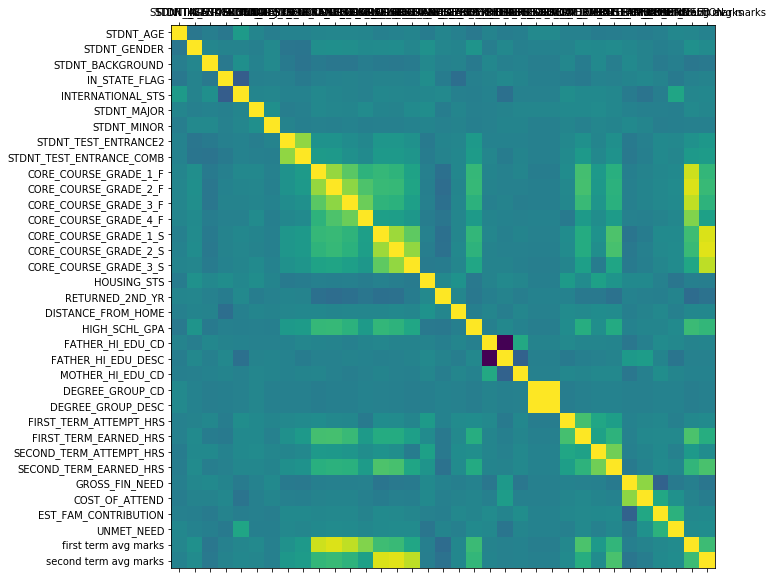

In [528]:
plot_feature_correlation(data)

In [529]:
del data["CORE_COURSE_GRADE_1_F"]
del data["CORE_COURSE_GRADE_2_F"]
del data["CORE_COURSE_GRADE_3_F"]
del data  ["CORE_COURSE_GRADE_4_F"]
del data["CORE_COURSE_GRADE_1_S"]
del data["CORE_COURSE_GRADE_2_S"]
del data ["CORE_COURSE_GRADE_3_S"]

In [530]:
del data["HIGH_SCHL_NAME"]

In [531]:
print(data['MOTHER_HI_EDU_DESC'].unique())
data.shape

['No Information' 'College/Beyond' 'Other/Unknown' 'High School'
 'Middle School/Junior High']


(3400, 29)

In [532]:
MOTHER_HI_EDU_DESC_map = {"College/Beyond" : 1, "Other/Unknown" : 0, "No Information" : 0, "High School": 2, 
                          "Middle School/Junior High": 3}
data['MOTHER_HI_EDU_DESC'] = data['MOTHER_HI_EDU_DESC'].map(MOTHER_HI_EDU_DESC_map)

In [533]:
data['MOTHER_HI_EDU_DESC']

0       0
1       1
2       0
3       1
4       2
       ..
3395    0
3396    0
3397    2
3398    1
3399    1
Name: MOTHER_HI_EDU_DESC, Length: 3400, dtype: int64

In [534]:
data.head(5)

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,first term avg marks,second term avg marks
0,18,1,1,1,0,0.0,0.0,1150.000000,1150.0,1,...,16,16,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,5.00,5.0
1,19,1,1,0,0,0.0,0.0,965.092295,1190.0,0,...,18,18,18.0,18.0,570000.000000,1.355760e+06,785760.000000,459300.000000,5.00,5.0
2,18,0,1,1,0,1.0,0.0,1020.000000,1030.0,1,...,15,15,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,5.00,5.0
3,18,0,1,1,0,0.0,0.0,1210.000000,1220.0,1,...,13,13,14.0,14.0,303402.506471,5.515335e+05,344689.923529,324167.123471,4.75,5.0
4,18,1,1,1,0,2.0,0.0,1200.000000,1190.0,0,...,12,12,12.0,12.0,835920.000000,1.355760e+06,519840.000000,278340.000000,5.00,5.0


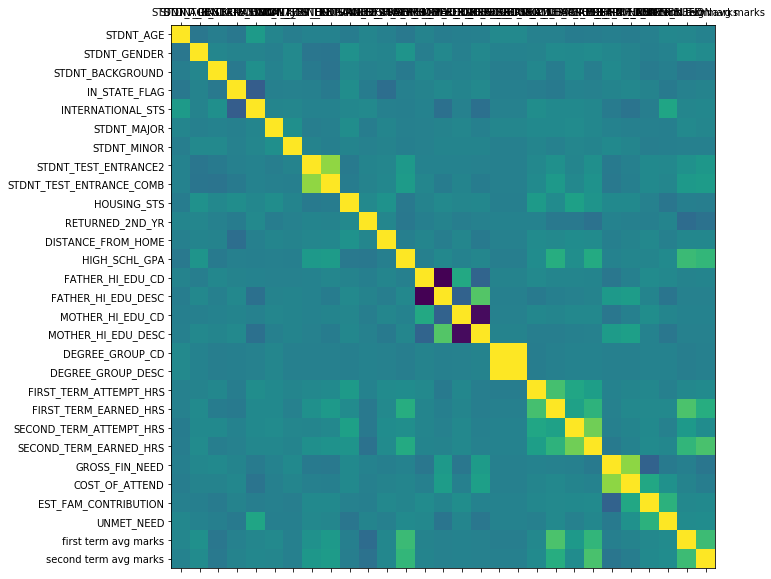

In [535]:
plot_feature_correlation(data)

In [536]:
data.corr()

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,first term avg marks,second term avg marks
STDNT_AGE,1.000000,-0.087615,-0.032366,-0.080212,0.181054,0.018865,-0.027919,0.000281,-0.002788,-0.046089,...,-0.008669,-0.008370,-0.043298,-0.038307,-0.020544,-0.037444,-0.017416,0.036612,0.026214,-0.003523
STDNT_GENDER,-0.087615,1.000000,0.025452,0.006342,0.006902,-0.016112,0.051157,-0.090036,-0.097514,0.110979,...,0.004785,0.061656,0.055420,0.066601,0.030616,0.006251,-0.021831,-0.002442,0.106320,0.066186
STDNT_BACKGROUND,-0.032366,0.025452,1.000000,-0.072272,0.094100,-0.004678,0.046810,-0.066604,-0.104081,0.037795,...,0.030558,-0.042403,0.055842,-0.031360,0.055247,0.009052,-0.049293,-0.022780,-0.082758,-0.071227
IN_STATE_FLAG,-0.080212,0.006342,-0.072272,1.000000,-0.269732,-0.015381,-0.008273,-0.013228,-0.060197,0.081133,...,-0.037848,-0.054033,-0.003841,-0.006147,0.009337,0.036307,0.006990,-0.059007,-0.009119,0.003448
INTERNATIONAL_STS,0.181054,0.006902,0.094100,-0.269732,1.000000,0.020959,0.028753,-0.002899,0.002157,0.031794,...,0.079707,0.054896,0.056634,0.032748,-0.048897,-0.103992,-0.027096,0.257457,0.023498,0.031142
STDNT_MAJOR,0.018865,-0.016112,-0.004678,-0.015381,0.020959,1.000000,0.098710,-0.028327,-0.016170,0.082359,...,0.056072,0.055942,0.066171,0.035577,0.000493,-0.017562,-0.016355,-0.024905,0.046610,0.027019
STDNT_MINOR,-0.027919,0.051157,0.046810,-0.008273,0.028753,0.098710,1.000000,0.003884,-0.020895,0.015450,...,0.021656,-0.005960,0.029439,0.009984,0.053501,0.019881,-0.032160,-0.023262,-0.014433,-0.015411
STDNT_TEST_ENTRANCE2,0.000281,-0.090036,-0.066604,-0.013228,-0.002899,-0.028327,0.003884,1.000000,0.700055,-0.063296,...,0.042752,0.106853,0.017248,0.099654,-0.054922,-0.013644,0.056291,0.043434,0.114336,0.156164
STDNT_TEST_ENTRANCE_COMB,-0.002788,-0.097514,-0.104081,-0.060197,0.002157,-0.016170,-0.020895,0.700055,1.000000,-0.040855,...,0.065058,0.164524,0.041618,0.119168,-0.074918,-0.025061,0.053631,0.026688,0.171545,0.185016
HOUSING_STS,-0.046089,0.110979,0.037795,0.081133,0.031794,0.082359,0.015450,-0.063296,-0.040855,1.000000,...,0.180396,0.066939,0.221139,0.132314,0.051879,0.055668,-0.008148,-0.092583,-0.023494,-0.030415


In [537]:
# Save the final dataset
data.to_csv('D:/data/capston project/python capstone/prepared-student_dataset-v1.csv', index=False)

In [538]:
data.dtypes

STDNT_AGE                     int64
STDNT_GENDER                  int64
STDNT_BACKGROUND              int64
IN_STATE_FLAG                 int64
INTERNATIONAL_STS             int64
STDNT_MAJOR                 float64
STDNT_MINOR                 float64
STDNT_TEST_ENTRANCE2        float64
STDNT_TEST_ENTRANCE_COMB    float64
HOUSING_STS                   int64
RETURNED_2ND_YR               int64
DISTANCE_FROM_HOME          float64
HIGH_SCHL_GPA               float64
FATHER_HI_EDU_CD            float64
FATHER_HI_EDU_DESC            int64
MOTHER_HI_EDU_CD            float64
MOTHER_HI_EDU_DESC            int64
DEGREE_GROUP_CD               int64
DEGREE_GROUP_DESC             int64
FIRST_TERM_ATTEMPT_HRS        int64
FIRST_TERM_EARNED_HRS         int64
SECOND_TERM_ATTEMPT_HRS     float64
SECOND_TERM_EARNED_HRS      float64
GROSS_FIN_NEED              float64
COST_OF_ATTEND              float64
EST_FAM_CONTRIBUTION        float64
UNMET_NEED                  float64
first term avg marks        

In [539]:
data.isnull().any()

STDNT_AGE                   False
STDNT_GENDER                False
STDNT_BACKGROUND            False
IN_STATE_FLAG               False
INTERNATIONAL_STS           False
STDNT_MAJOR                  True
STDNT_MINOR                  True
STDNT_TEST_ENTRANCE2        False
STDNT_TEST_ENTRANCE_COMB    False
HOUSING_STS                 False
RETURNED_2ND_YR             False
DISTANCE_FROM_HOME          False
HIGH_SCHL_GPA               False
FATHER_HI_EDU_CD            False
FATHER_HI_EDU_DESC          False
MOTHER_HI_EDU_CD            False
MOTHER_HI_EDU_DESC          False
DEGREE_GROUP_CD             False
DEGREE_GROUP_DESC           False
FIRST_TERM_ATTEMPT_HRS      False
FIRST_TERM_EARNED_HRS       False
SECOND_TERM_ATTEMPT_HRS     False
SECOND_TERM_EARNED_HRS      False
GROSS_FIN_NEED              False
COST_OF_ATTEND              False
EST_FAM_CONTRIBUTION        False
UNMET_NEED                  False
first term avg marks        False
second term avg marks       False
dtype: bool

In [540]:
data.groupby('RETURNED_2ND_YR').mean()

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,HOUSING_STS,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,first term avg marks,second term avg marks
RETURNED_2ND_YR,,,,,,,,,,,,,,,,,,,,,
0,17.988420,0.621965,1.673142,0.907359,0.005603,1.487191,0.137879,964.022841,997.387240,0.405304,...,13.985058,12.311916,14.362988,12.723322,502744.628853,826636.655026,565862.978470,493886.821859,3.936029,3.788943
1,18.015214,0.656985,1.650069,0.876902,0.016598,1.402619,0.127601,969.052087,999.133142,0.461964,...,13.988935,11.809129,14.000231,11.725438,504056.096175,813737.774030,532663.437247,505055.125240,3.627248,3.514523


In [541]:
print(pd.crosstab(data.STDNT_GENDER, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
     .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR         0         1
STDNT_GENDER                       
0                0.803175  0.196825
1                0.778037  0.221963


Female have 22.19% attrition compared to male(19.68%)
....female has 77.80% of joining rate compare to male(80.31%)

In [542]:
table=print(pd.crosstab(data.STDNT_MAJOR, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count',)
            .round(0).apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR         0         1
STDNT_MAJOR                        
0.0              0.758696  0.241304
1.0              0.774708  0.225292
2.0              0.817195  0.182805
3.0              0.780952  0.219048


Students with undeclared have high attrition rate of24.13% 


In [543]:
table=print(pd.crosstab(data.STDNT_MINOR, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR         0         1
STDNT_MINOR                        
0.0              0.786392  0.213608
1.0              0.850000  0.150000
2.0              0.773333  0.226667
3.0              0.850000  0.150000


students taken Arts and Lang have high attrition og 22.66%

In [544]:
table=print(pd.crosstab(data.HOUSING_STS, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR         0         1
HOUSING_STS                        
0                0.803635  0.196365
1                0.764623  0.235377


High attrition on students  on-campus (23.53%)

In [545]:
table=print(pd.crosstab(data.DEGREE_GROUP_CD, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR         0         1
DEGREE_GROUP_CD                    
1                0.787234  0.212766
2                0.833333  0.166667
3                0.750000  0.250000


Students who have choosen group "V" have high attrition rate of 25%

In [546]:
table=print(pd.crosstab(data.DEGREE_GROUP_DESC, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR           0         1
DEGREE_GROUP_DESC                    
1                  0.787234  0.212766
2                  0.833333  0.166667
3                  0.750000  0.250000


Students who have enrolled for career Associate have high attrition of 25%

In [547]:
table=print(pd.crosstab(data.FATHER_HI_EDU_DESC, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR            0         1
FATHER_HI_EDU_DESC                    
0                   0.770517  0.229483
1                   0.803667  0.196333
2                   0.783683  0.216317
3                   0.731959  0.268041


Father with middle/junior high have high attrition value (26.80%)

In [548]:
table=print(pd.crosstab(data.IN_STATE_FLAG, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR         0         1
IN_STATE_FLAG                      
0                0.735905  0.264095
1                0.793013  0.206987


Students who are from other state have high attrition rate of(26.4%) 

In [549]:
table=print(pd.crosstab(data.STDNT_BACKGROUND, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR          0         1
STDNT_BACKGROUND                    
1                 0.770893  0.229107
2                 0.820486  0.179514
3                 0.851064  0.148936
4                 0.812950  0.187050
5                 0.800000  0.200000
6                 0.773585  0.226415
7                 0.631579  0.368421
8                 0.500000  0.500000


Studence with background of category BGD5 have the high attrition rate of 50%

In [550]:
table=print(pd.crosstab(data.MOTHER_HI_EDU_DESC, data.RETURNED_2ND_YR, values=data.RETURNED_2ND_YR, aggfunc='count').round(0)
           .apply(lambda r: r/r.sum(), axis=1))

RETURNED_2ND_YR            0         1
MOTHER_HI_EDU_DESC                    
0                   0.767327  0.232673
1                   0.799333  0.200667
2                   0.783320  0.216680
3                   0.774648  0.225352


In [551]:
grouped = data.groupby('RETURNED_2ND_YR')
grouped['COST_OF_ATTEND'].agg('mean')

RETURNED_2ND_YR
0    826636.655026
1    813737.774030
Name: COST_OF_ATTEND, dtype: float64

In [552]:
grouped['EST_FAM_CONTRIBUTION'].agg('mean')

RETURNED_2ND_YR
0    565862.978470
1    532663.437247
Name: EST_FAM_CONTRIBUTION, dtype: float64

In [553]:
grouped['HIGH_SCHL_GPA'].agg('mean')

RETURNED_2ND_YR
0    3.221498
1    3.133273
Name: HIGH_SCHL_GPA, dtype: float64

In [554]:
grouped['DISTANCE_FROM_HOME'].agg('mean')

RETURNED_2ND_YR
0     96.525356
1    112.043225
Name: DISTANCE_FROM_HOME, dtype: float64

In [555]:
grouped['GROSS_FIN_NEED'].agg('mean')

RETURNED_2ND_YR
0    502744.628853
1    504056.096175
Name: GROSS_FIN_NEED, dtype: float64

In [556]:
grouped['FIRST_TERM_ATTEMPT_HRS'].agg('mean')

RETURNED_2ND_YR
0    13.985058
1    13.988935
Name: FIRST_TERM_ATTEMPT_HRS, dtype: float64

In [557]:
grouped['SECOND_TERM_ATTEMPT_HRS'].agg('mean') 

RETURNED_2ND_YR
0    14.362988
1    14.000231
Name: SECOND_TERM_ATTEMPT_HRS, dtype: float64

In [558]:
grouped['first term avg marks'].agg('mean')

RETURNED_2ND_YR
0    3.936029
1    3.627248
Name: first term avg marks, dtype: float64

In [559]:
grouped['second term avg marks'].agg('mean')

RETURNED_2ND_YR
0    3.788943
1    3.514523
Name: second term avg marks, dtype: float64

In [560]:
grouped['STDNT_AGE'].agg('mean')

RETURNED_2ND_YR
0    17.988420
1    18.015214
Name: STDNT_AGE, dtype: float64

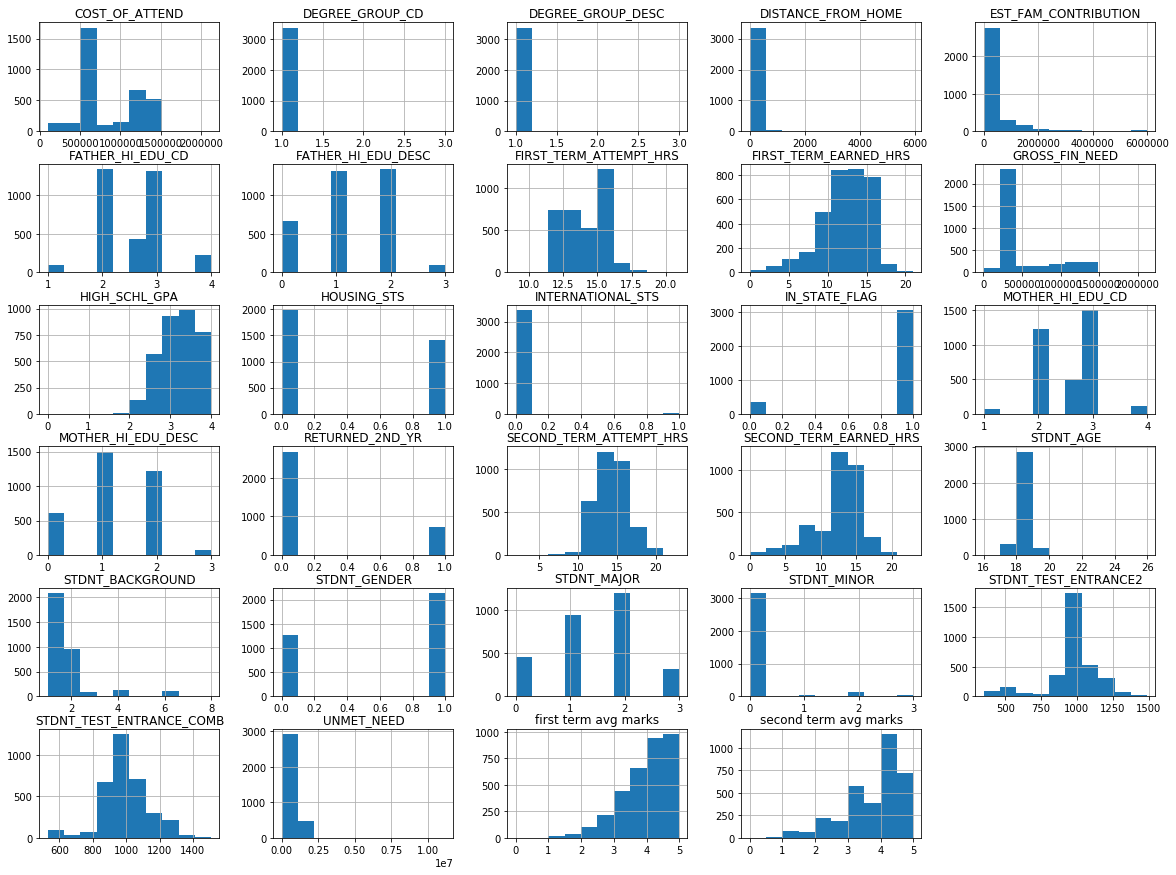

In [561]:
#Histogram of numeric variables
num_bins = 10

data.hist(bins=num_bins, figsize=(20,15))
plt.savefig("student_histogram_plots")
plt.show()

In [562]:
data_vars=data.columns.values.tolist()
y=['RETURNED_2ND_YR']
X=[i for i in data_vars if i not in y]

In [563]:
X

['STDNT_AGE',
 'STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'STDNT_TEST_ENTRANCE2',
 'STDNT_TEST_ENTRANCE_COMB',
 'HOUSING_STS',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'FATHER_HI_EDU_CD',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_CD',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED',
 'first term avg marks',
 'second term avg marks']

In [564]:
data['STDNT_MAJOR'] = data['STDNT_MAJOR'].fillna(data['STDNT_MAJOR'].mode()[0])
data['STDNT_MINOR'] = data['STDNT_MINOR'].fillna(data['STDNT_MINOR'].mode()[0])

In [565]:
data.isnull().any()

STDNT_AGE                   False
STDNT_GENDER                False
STDNT_BACKGROUND            False
IN_STATE_FLAG               False
INTERNATIONAL_STS           False
STDNT_MAJOR                 False
STDNT_MINOR                 False
STDNT_TEST_ENTRANCE2        False
STDNT_TEST_ENTRANCE_COMB    False
HOUSING_STS                 False
RETURNED_2ND_YR             False
DISTANCE_FROM_HOME          False
HIGH_SCHL_GPA               False
FATHER_HI_EDU_CD            False
FATHER_HI_EDU_DESC          False
MOTHER_HI_EDU_CD            False
MOTHER_HI_EDU_DESC          False
DEGREE_GROUP_CD             False
DEGREE_GROUP_DESC           False
FIRST_TERM_ATTEMPT_HRS      False
FIRST_TERM_EARNED_HRS       False
SECOND_TERM_ATTEMPT_HRS     False
SECOND_TERM_EARNED_HRS      False
GROSS_FIN_NEED              False
COST_OF_ATTEND              False
EST_FAM_CONTRIBUTION        False
UNMET_NEED                  False
first term avg marks        False
second term avg marks       False
dtype: bool

Text(0.5, 1.0, 'Returned second year')

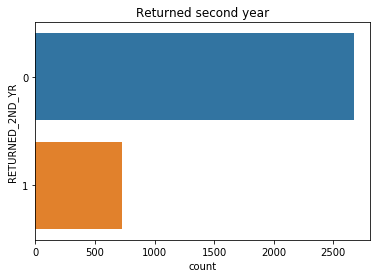

In [566]:
#distribution of  y vs data
sns.countplot(y = data.RETURNED_2ND_YR,data = data)
plt.title("Returned second year")

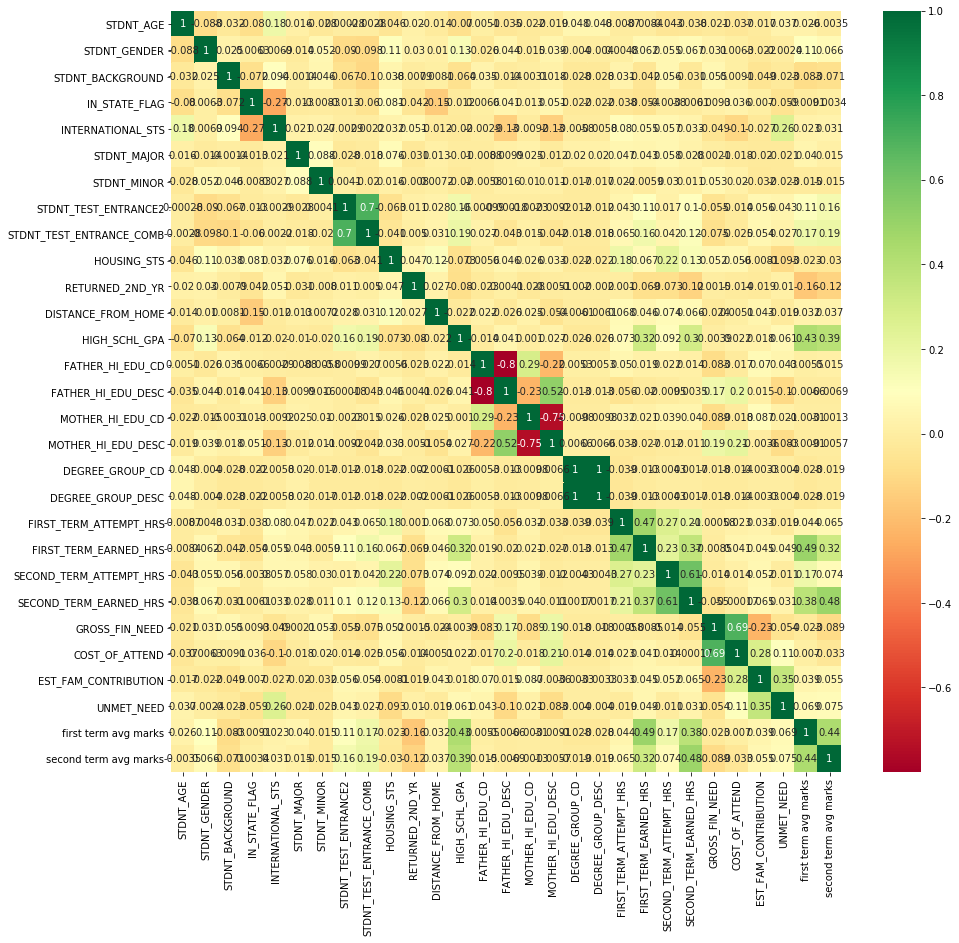

In [567]:
plt.figure(figsize=(15,14))
p = sns.heatmap(data.corr(),annot= True,cmap = 'RdYlGn')

# Feature Selection
The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.

In [568]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [569]:
#Recursive Feature Elimination (RFE)
model = LogisticRegression()

rfe = RFE(model, 15)
rfe = rfe.fit(data[X], data[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of itera

[ True  True  True  True False  True False False False False False False
  True  True  True  True  True  True  True False  True False False False
 False False  True  True]
[ 1  1  1  1 14  1 10  6  5 11  7  3  1  1  1  1  1  1  1  4  1  2  9  8
 12 13  1  1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [570]:
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [571]:
cols=['STDNT_AGE','STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','STDNT_MAJOR','FATHER_HI_EDU_CD',
      'FATHER_HI_EDU_DESC','MOTHER_HI_EDU_CD','MOTHER_HI_EDU_DESC','DEGREE_GROUP_CD','DEGREE_GROUP_DESC',
 'FIRST_TERM_ATTEMPT_HRS','SECOND_TERM_ATTEMPT_HRS','first term avg marks',
 'second term avg marks']

In [572]:
X=data[cols]
y=data['RETURNED_2ND_YR']

In [573]:
#Split data into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Logistic Regression Classifier

In [574]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [575]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.795


# Random Forest Classifier

In [576]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [577]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.830


# SVM Classifier

In [578]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [579]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.794


### Out of the three models, Random Forest has the best performance. We will perform 10-fold cross validation to confirm our results.

# 10 Fold Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest and SVM model.

In [580]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy for Random Forest Classifier: 0.818


In [581]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy for SVM Classifier: 0.784



From the CV results we observe that the average accuracy remains very close to the Random Forest & SVM model accuracy; hence, we can conclude that the models generalize well. 

# Precision and Recall
We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

In [582]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       810
           1       0.77      0.25      0.38       210

    accuracy                           0.83      1020
   macro avg       0.80      0.62      0.64      1020
weighted avg       0.82      0.83      0.79      1020



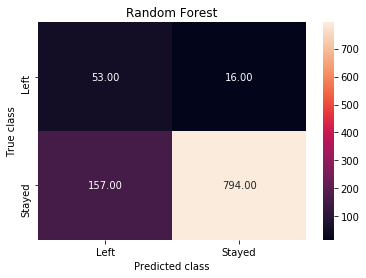

In [583]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [584]:
#PRScores for Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       810
           1       0.67      0.01      0.02       210

    accuracy                           0.80      1020
   macro avg       0.73      0.50      0.45      1020
weighted avg       0.77      0.80      0.71      1020



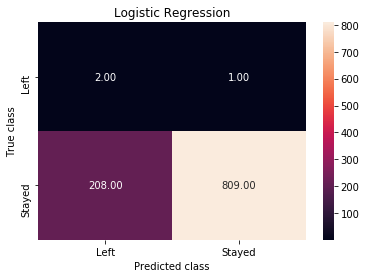

In [585]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [586]:
#PR scores for SVM
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       810
           1       0.00      0.00      0.00       210

    accuracy                           0.79      1020
   macro avg       0.40      0.50      0.44      1020
weighted avg       0.63      0.79      0.70      1020



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


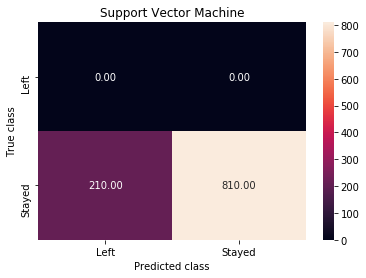

In [587]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

# ROC Curve 

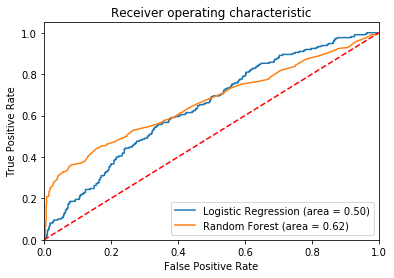

In [588]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#ROC for logistic regression
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Variable Imporatnce for Random Forest Classifier
According to our Random Forest model, the the most important features which influence whether to leave the company, in ascending order are as follows:

In [589]:
import numpy as np
feature_labels = np.array(['STDNT_AGE','STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','STDNT_MAJOR','FATHER_HI_EDU_CD',
      'FATHER_HI_EDU_DESC','MOTHER_HI_EDU_CD','MOTHER_HI_EDU_DESC','DEGREE_GROUP_CD','DEGREE_GROUP_DESC',
 'FIRST_TERM_ATTEMPT_HRS','SECOND_TERM_ATTEMPT_HRS','first term avg marks',
 'second term avg marks'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    analysis_result = ('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

DEGREE_GROUP_CD-0.17%
DEGREE_GROUP_DESC-0.18%
IN_STATE_FLAG-1.95%
MOTHER_HI_EDU_DESC-3.58%
FATHER_HI_EDU_DESC-3.64%
MOTHER_HI_EDU_CD-3.68%
STDNT_GENDER-3.69%
FATHER_HI_EDU_CD-3.94%
STDNT_AGE-4.23%
STDNT_BACKGROUND-5.58%
STDNT_MAJOR-6.94%
FIRST_TERM_ATTEMPT_HRS-11.30%
first term avg marks-15.78%
second term avg marks-15.96%
SECOND_TERM_ATTEMPT_HRS-19.36%


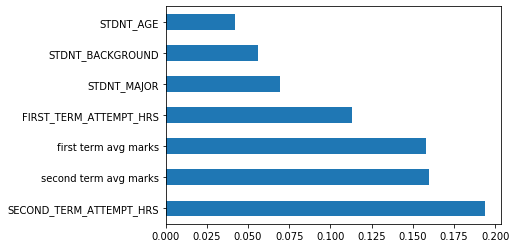

In [590]:
(pd.Series(rf.feature_importances_, index=X.columns)
   .nlargest(7)
   .plot(kind='barh'))        

In [591]:
file = open("D:/data/capston project/python capstone/new/variable_importance.txt","w+")
file.write(analysis_result)
file.close()

### INSIGHTS

In [406]:
# 1. In gender females have more attrition compared to Male
#Female have 2.19% of attrition rate
#Male have 19.68% of attrition rate.


In [407]:
#2. In students major,  students having undeclared have a high attrition rate of 24.12%
#Science- 22.52%
#Arts and Language – 21.90%
#Commerce – 19.65%


In [408]:
"""

3.	In students Minor, Students with Arts and Language have high attrition rate 22.33%
“N”- 0.21%
Science-15.1 %
Commerce- 15.1%

*** Comparison of both students Major and Minor students opted for commerce have less attrition.

4.	In housing –STS, students on campus have high attrition compared to off-campus 
(23.53%)- (19.63%)

"""

'\n\n3.\tIn students Minor, Students with Arts and Language have high attrition rate 22.33.1\n“N”- 0.21.1\nScience-15.1\nCommerce- 15.1\n\n*** Comparison of both students Major and Minor students opted for commerce have less attrition.\n\n4.\tIn housing –STS, students on campus have high attrition compared to off-campus \n(23.53%)- (19.63%)\n'

In [ ]:
""""

5.	In degree groupCD, a student who has to choose group "V" have high attrition of 25% compared to B (21.27%) and A(16.66%)
6.	In degree group, DES students with career associate have a high attrition rate of (25%) compared to bachelors (21.2) and associate (16.66)
7.	Father with Middle school and Junior High school has high attrition (26.80.1)
College & Beyobd (19.63%) High school (21.63%)
8.	Students from other state have a high attrition rate of (26.4%)  compared to the student of the same state.
9.	Student background of the category BGD-5  have high attrition of 50% compared to BGD-7 (36.84%)  and BGD-1(22.91%)
10.	Mothers with no information and unknown  have high attrition (23.26%)

""""""

### RECOMMENDATIONS 

In [ ]:
""""""
1.	FAMILY BACKGROUND
•	Mother high education-  College/ Beyond
•	Father high education –College/Beyond
•	Family Contribution- 56,58,62.97

2.	STUDENTS BACKGROUND
•	Students with background category (BDG-5) have more attrition, should  try to avoid them and take BGD-6, BGD-3 and BGD-4
•	Students in high school should at least have a minimum CGPA 3.221
•	Students should be within the age of 18 years

3.	Others 
•	The students within 96.52 miles are highly preferred.
•	A student within the state of the university.

4.	STUDENTS EDUCATION
•	Students should have attended the first team with min 13.9hrs
•	Second term 14.36 hrs
•	First-term marks – 3.93
•	Second term marks – 3.788

""""""
